### Time Series Analysis: Background
This dataset is part of a Kaggle project in which the goal is to predict the page views for 145k Wikipedia pages. Each row represents an article and spans from summer of 2015 to the end of 2016. I've already written a function to parse out the article name, language, and access type of each record. The goal of the interview will be to write a function that finds the top 5 articles per language and plots them, as an exercise in exploratory visualization.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [3]:
orig_train = pd.read_csv('/Users/christinejiang/Documents/Python/data/train_1.csv')

In [4]:
orig_train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
for col in orig_train.columns[1:]:
    orig_train[col] = pd.to_numeric(orig_train[col], downcast = 'integer')

In [6]:
def find_lang(page):
    match = re.search('[a-z][a-z].wikipedia.org', page)
    if match:
        return match.group(0)[0:2]
    return 'na'

def find_article(page):
    match = re.search('[a-z][a-z].wikipedia.org.', page)
    if match:
        article_end = match.start()-1
        return(page[0:article_end])
    return 'na'

def find_access(page):
    match = re.search('.*.wikipedia.org.', page)
    if match:
        access_start = match.end()
        return(page[access_start:])
    return 'na'

orig_train['Language'] = orig_train['Page'].map(find_lang)
orig_train['Article'] = orig_train['Page'].map(find_article)
orig_train['Access'] = orig_train['Page'].map(find_access)

dates = orig_train.iloc[:,1:551]
labels = orig_train[['Article','Language','Access','Page']]
newtrain = pd.concat([labels, dates], axis = 1)

In [7]:
newtrain.head()

,Article,Language,Access,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,zh,all-access_spider,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,zh,all-access_spider,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,zh,all-access_spider,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,zh,all-access_spider,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You,zh,all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


### RC Pair Programming Interview
Write a function that finds the top articles (by total views) per language. Plot the page views of these articles - either grouped by language or a separate graph for each article.

In [46]:
languages = newtrain['Language'].unique()
languages

array(['zh', 'fr', 'en', 'na', 'ru', 'de', 'ja', 'es'], dtype=object)

In [34]:
newtrain['Language'].value_counts()

en    24108
ja    20431
de    18547
na    17855
fr    17802
zh    17229
ru    15022
es    14069
Name: Language, dtype: int64

In [47]:
#calculate totals, fill blanks
newtrain['Total'] = newtrain.iloc[:,4:].sum(axis=1)
newtrain_blank = newtrain.fillna(0)

zh
fr
en
na
ru
de
ja
es


/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/christinejian

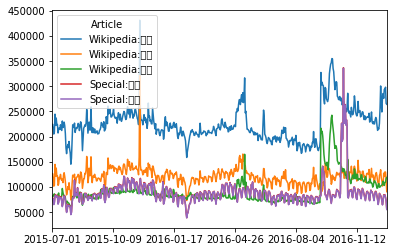

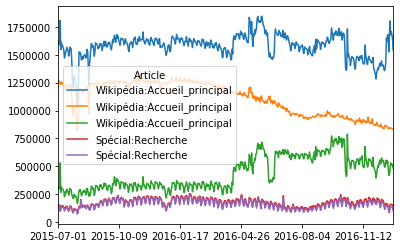

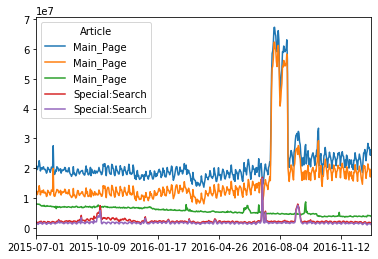

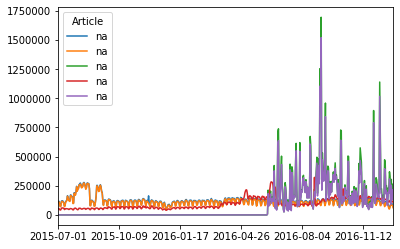

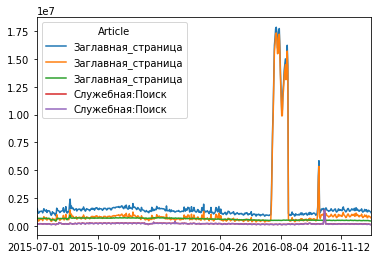

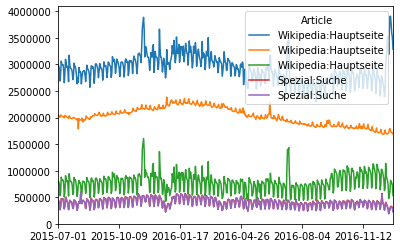

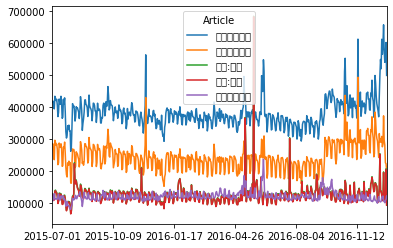

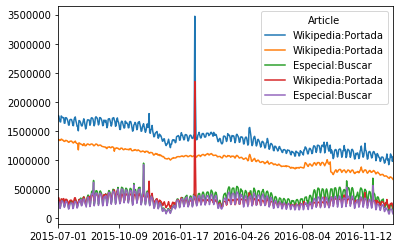

In [81]:
#create dictionary of each language's dataframe
language_dictionary = {}
for language in languages:
    language_dictionary[language] = newtrain_blank[newtrain_blank['Language'] == language]
    top5_chinese = language_dictionary[language].nlargest(5, ['Total'])
    top5_clean = top5_chinese.iloc[:,4:-1]
    articles = top5_chinese['Article']
    top5_transposed = top5_clean.T
    top5_transposed.columns = articles
    top5_transposed.plot()

/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/christinejiang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/christinejiang/

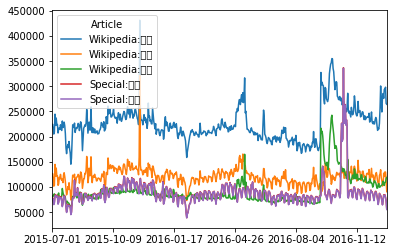

In [79]:
top5_chinese = language_dictionary['zh'].nlargest(5, ['Total'])
top5_clean = top5_chinese.iloc[:,4:-1]
top5_transposed = top5_clean.T
top5_transposed.columns = articles
top5_transposed.plot()

In [68]:

articles

28727     Wikipedia:首页
61350     Wikipedia:首页
105844    Wikipedia:首页
28728       Special:搜索
61351       Special:搜索
Name: Article, dtype: object

In [78]:
top5_transposed

Article,Wikipedia:首页,Wikipedia:首页,Wikipedia:首页,Special:搜索,Special:搜索
2015-07-01,220658.0,120967.0,81669.0,77290.0,76099.0
2015-07-02,224568.0,126424.0,80507.0,78725.0,77630.0
2015-07-03,216749.0,117997.0,81265.0,76063.0,74821.0
2015-07-04,204914.0,101410.0,84912.0,66035.0,64778.0
2015-07-05,208939.0,102979.0,86239.0,69730.0,68399.0
...,...,...,...,...,...
2016-12-27,293672.0,120615.0,102868.0,83974.0,82963.0
2016-12-28,292819.0,129725.0,109015.0,84289.0,83460.0
2016-12-29,297940.0,129400.0,109373.0,79327.0,78300.0
2016-12-30,265810.0,112847.0,115971.0,72384.0,71488.0
